# Load and View CIFAR-10 Data

Michael Madden, Feb 2021.

This is sample code to load data from the CIFAR-10 dataset, and view some images.
The function unpickle() below is taken from the CIFAR website.

Note that the CIFAR-10 images as displayed are quite fuzzy looking, because they are low res (32x32).

Befor running this:
* Download the CIFAR-10 dataset from https://www.cs.toronto.edu/~kriz/cifar.html 
* Unzip and extract the tar file to get individual files called data_batch_1, etc. 

In [1]:
# This function taken from the CIFAR website

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Loaded in this way, each of the batch files contains a dictionary with the following elements:
#   data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. 
#           The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. 
#           The image is stored in row-major order, so that the first 32 entries of the array are the red channel values 
#           of the first row of the image.
#   labels -- a list of 10000 numbers in the range 0-9. 
#             The number at index i indicates the label of the ith image in the array data.


In [2]:
def loadbatch(batchname):
    folder = 'cifar-10-batches-py'
    batch = unpickle(folder+"/"+batchname)
    return batch

In [3]:
def loadlabelnames():
    folder = 'cifar-10-batches-py'
    meta = unpickle(folder+"/"+'batches.meta')
    return meta[b'label_names']

In [13]:
import matplotlib.pyplot as plt

def visualise(data, index):
    # MM Jan 2019: Given a CIFAR data nparray and the index of an image, display the image.
    # Note that the images will be quite fuzzy looking, because they are low res (32x32).

    picture = data[index]
    # Initially, the data is a 1D array of 3072 pixels; reshape it to a 3D array of 3x32x32 pixels
    # Note: after reshaping like this, you could select one colour channel or average them.
    picture.shape = (3,32,32) 
    
    # Plot.imshow requires the RGB to be the third dimension, not the first, so need to rearrange
    picture = picture.transpose([1, 2, 0])
    print(picture.shape)
    # plt.imshow(picture)
    # plt.show()

In [5]:
batch1 = loadbatch('data_batch_1')
print("Number of items in the batch is", len(batch1))

# Display all keys, so we can see the ones we want
print('All keys in the batch:', batch1.keys())

Number of items in the batch is 4
All keys in the batch: dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


In [6]:
data = batch1[b'data']
labels = batch1[b'labels']
print ("size of data in this batch:", len(data), ", size of labels:", len(labels))
print (type(data))
print(data.shape)

names = loadlabelnames()

size of data in this batch: 10000 , size of labels: 10000
<class 'numpy.ndarray'>
(10000, 3072)


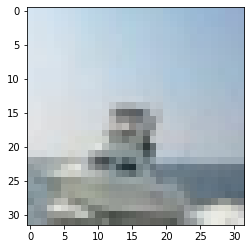

Image 100 : Class is  b'ship'


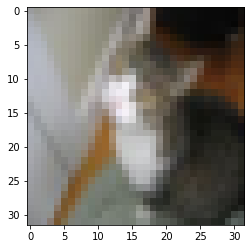

Image 101 : Class is  b'cat'


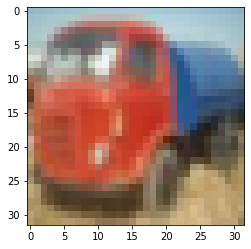

Image 102 : Class is  b'truck'


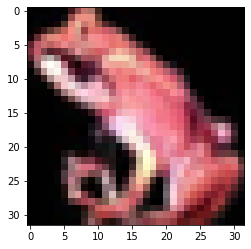

Image 103 : Class is  b'frog'


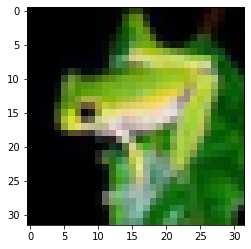

Image 104 : Class is  b'frog'


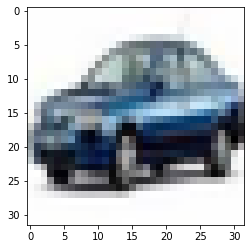

Image 105 : Class is  b'automobile'


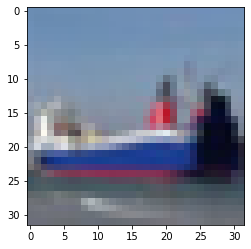

Image 106 : Class is  b'ship'


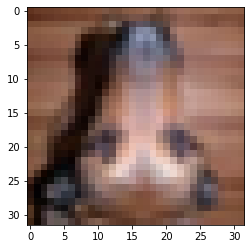

Image 107 : Class is  b'dog'


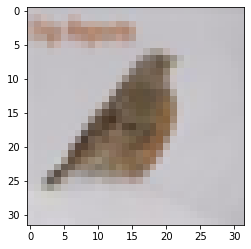

Image 108 : Class is  b'bird'


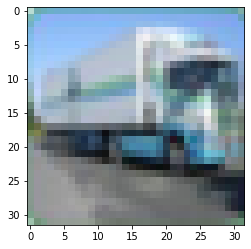

Image 109 : Class is  b'truck'


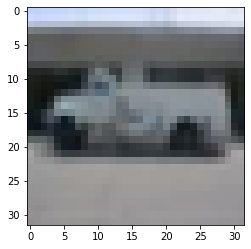

Image 110 : Class is  b'truck'


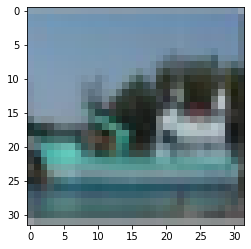

Image 111 : Class is  b'ship'


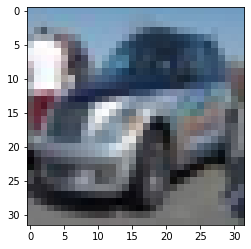

Image 112 : Class is  b'automobile'


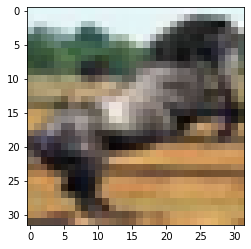

Image 113 : Class is  b'horse'


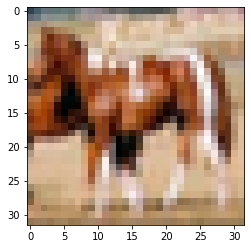

Image 114 : Class is  b'horse'


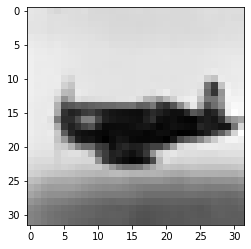

Image 115 : Class is  b'airplane'


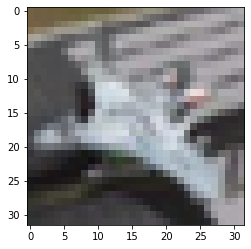

Image 116 : Class is  b'airplane'


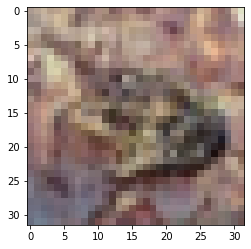

Image 117 : Class is  b'frog'


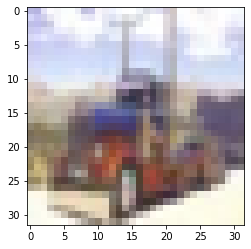

Image 118 : Class is  b'truck'


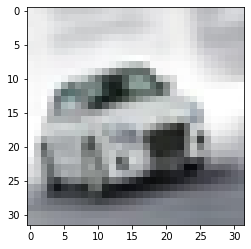

Image 119 : Class is  b'automobile'


In [7]:
# Display a few images from the batch
for i in range (100,120):
   visualise(data, i)
   print("Image", i,": Class is ", names[labels[i]])

In [14]:
visualise(data,1)

(32, 32, 3)


In [15]:
data.shape

(10000, 3072)